### 📌 Setup

In [1]:
import sys
import os

# Add project root to Python path
sys.path.append(os.path.abspath(os.path.join('..')))


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from src.data_processor import DataAnalyzer  

from src.utils import load_and_parse_data, compute_descriptive_stats, compute_sentiment_counts, extract_top_keywords

%matplotlib inline
sns.set(style="whitegrid")

### Load News Dataset

In [3]:
file_path = '../data/raw_analyst_ratings.csv'
analyzer = DataAnalyzer(file_path)
df = analyzer.get_dataframe()
df.head(20)


[Warning] Dropping 1351341 rows with invalid dates.
PRINTIG: NUM OF INVALD 1351341


,Unnamed: 0,headline,url,publisher,date,stock
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 14:30:54+00:00,A
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 14:45:20+00:00,A
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 08:30:07+00:00,A
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 16:45:06+00:00,A
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 15:38:59+00:00,A
5,5,"CFRA Maintains Hold on Agilent Technologies, L...",https://www.benzinga.com/news/20/05/16095163/c...,vishwanath@benzinga.com,2020-05-22 15:23:25+00:00,A
6,6,"UBS Maintains Neutral on Agilent Technologies,...",https://www.benzinga.com/news/20/05/16094027/u...,vishwanath@benzinga.com,2020-05-22 13:36:20+00:00,A
7,7,Agilent Technologies shares are trading higher...,https://www.benzinga.com/wiim/20/05/16093805/a...,Benzinga Newsdesk,2020-05-22 13:07:04+00:00,A
8,8,Wells Fargo Maintains Overweight on Agilent Te...,https://www.benzinga.com/news/20/05/16093505/w...,vishwanath@benzinga.com,2020-05-22 12:37:59+00:00,A
9,9,10 Biggest Price Target Changes For Friday,https://www.benzinga.com/analyst-ratings/price...,Lisa Levin,2020-05-22 12:06:17+00:00,A


### Descriptive Stats


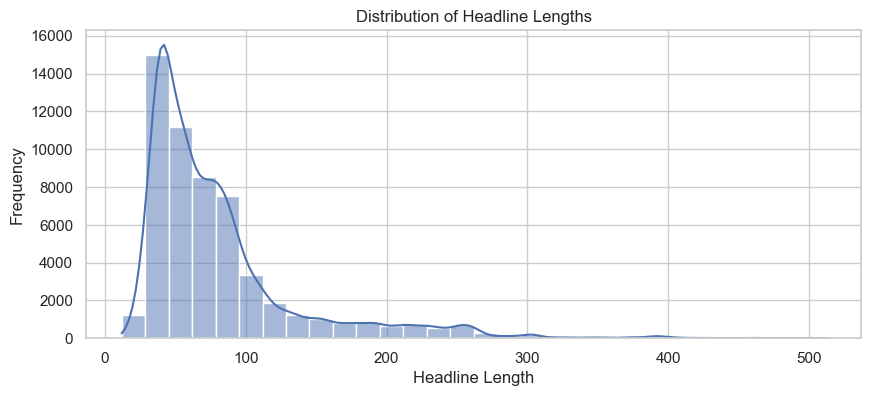

C:\Users\Lidya\AppData\Local\Temp\ipykernel_2224\124153918.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_publishers.index, y=top_publishers.values, palette='muted')


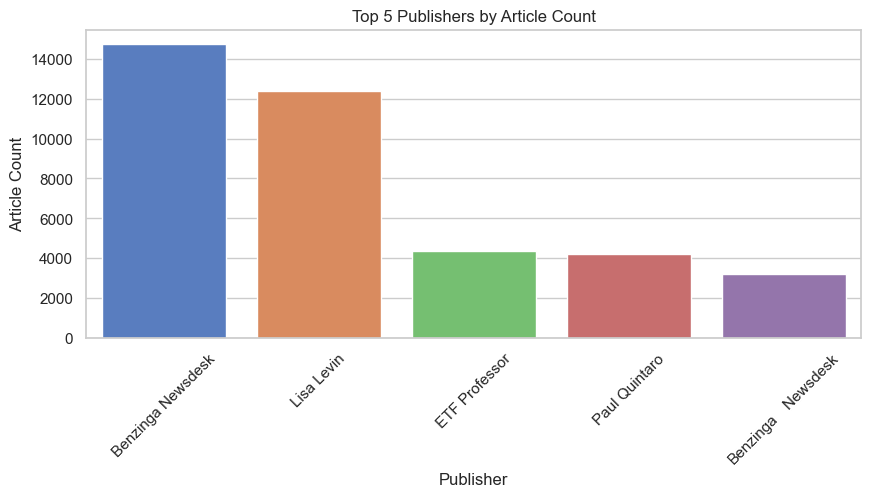

In [4]:
stats = analyzer.get_descriptive_stats()

# Headline Length
df['headline_length'] = df['headline'].apply(len)
plt.figure(figsize=(10, 4))
sns.histplot(df['headline_length'], bins=30, kde=True)
plt.title("Distribution of Headline Lengths")
plt.xlabel("Headline Length")
plt.ylabel("Frequency")
plt.show()

# Top Publishers
top_publishers = stats['publisher_counts']
plt.figure(figsize=(10, 4))
sns.barplot(x=top_publishers.index, y=top_publishers.values, palette='muted')
plt.title("Top 5 Publishers by Article Count")
plt.ylabel("Article Count")
plt.xlabel("Publisher")
plt.xticks(rotation=45)
plt.show()

### Time Analysis


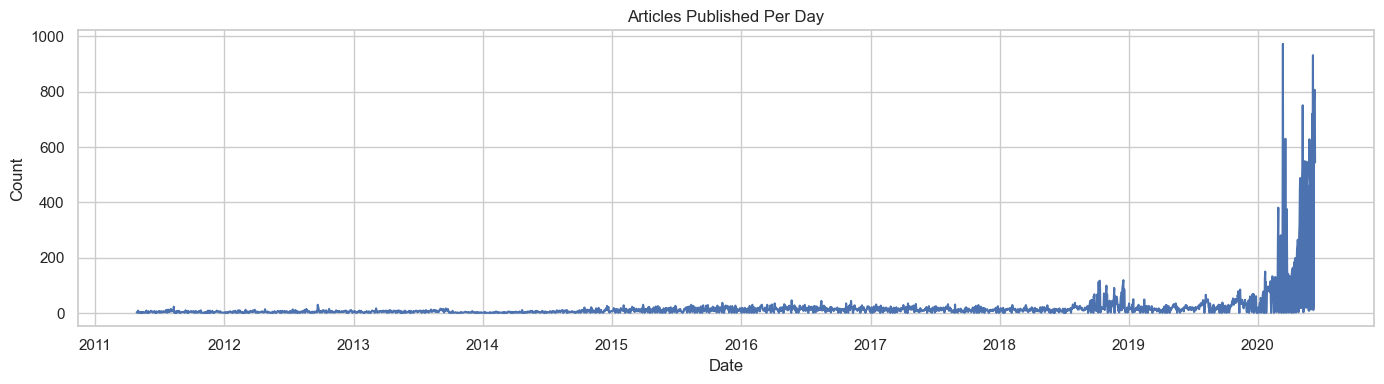

In [5]:
# Articles per day
df['date_only'] = df['date'].dt.date
daily_counts = df['date_only'].value_counts().sort_index()

plt.figure(figsize=(14, 4))
daily_counts.plot()
plt.title("Articles Published Per Day")
plt.xlabel("Date")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

### Sentiment Analysis


C:\Users\Lidya\AppData\Local\Temp\ipykernel_2224\1347380199.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='pastel')


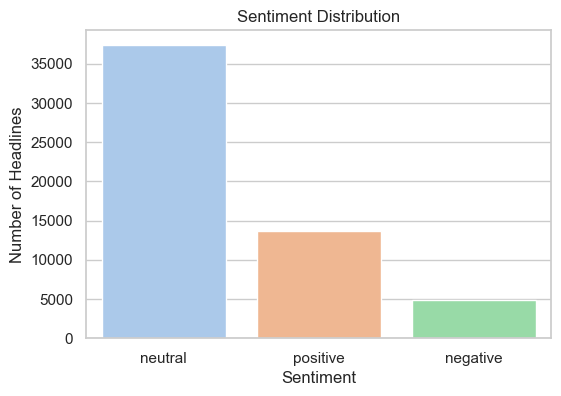

In [6]:
sentiment_counts = analyzer.get_sentiment()
plt.figure(figsize=(6, 4))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='pastel')
plt.title("Sentiment Distribution")
plt.ylabel("Number of Headlines")
plt.xlabel("Sentiment")
plt.show()

### Top Keywords


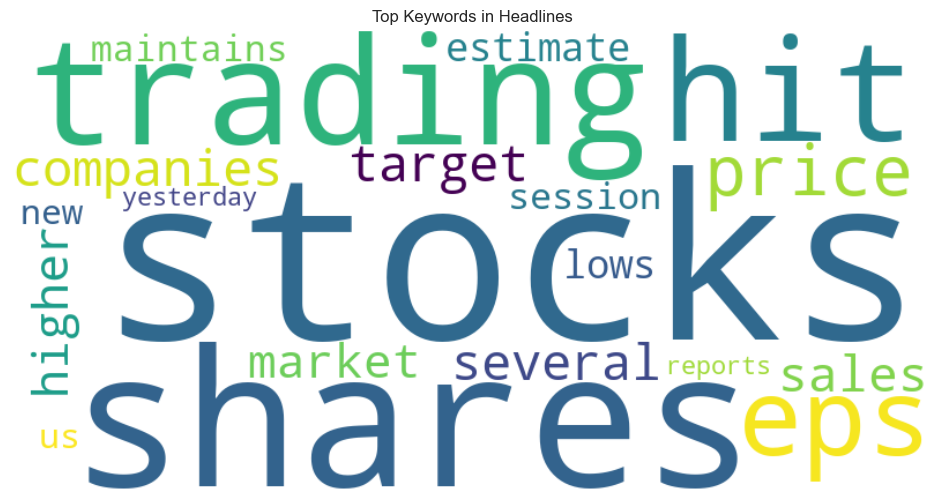

In [7]:
keywords = analyzer.get_keywords(top_n=20)
word_freq = dict(keywords)

wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Top Keywords in Headlines")
plt.show()